# Mental Health Survey daataset

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (12, 8)})
sns.set_palette('Set3')
np.random.seed(86)

In [2]:
df = pd.read_csv('./data/mental-health/survey.csv')

### Initial data observation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [4]:
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


### Data correction and transformation

Transform timestamp.

In [5]:
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)

Check 'Gender' column.

In [6]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female (trans)                                      2
Man                                                 2
Female                                              2
Cis Male                                            2
Enby                                                1
Trans woman                                         1
Agender                                             1
Malr                        

In [7]:
df.replace(
    {
        'Gender': {
            'male': 'Male',
            'm': 'Male',
            'M': 'Male',
            'female': 'Female',
            'f': 'Female',
            'F': 'Female'
        }
    },
    inplace=True
)

In [8]:
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = 'Other'

In [9]:
df['Gender'].value_counts()

Male      971
Female    236
Other      52
Name: Gender, dtype: int64

Check 'Age' column.

In [10]:
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [11]:
df.loc[df['Age'] < 0, 'Age'] = np.nan
df.loc[df['Age'] > 200, 'Age'] = np.nan
df.loc[:, 'Age'] = df['Age'].astype(np.float32)

In [12]:
df['Age'].describe()

count    1254.000000
mean       32.019138
std         7.374999
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

Useful columns.

In [13]:
df['From USA'] = df['Country'] == 'United States'

# Data exploration

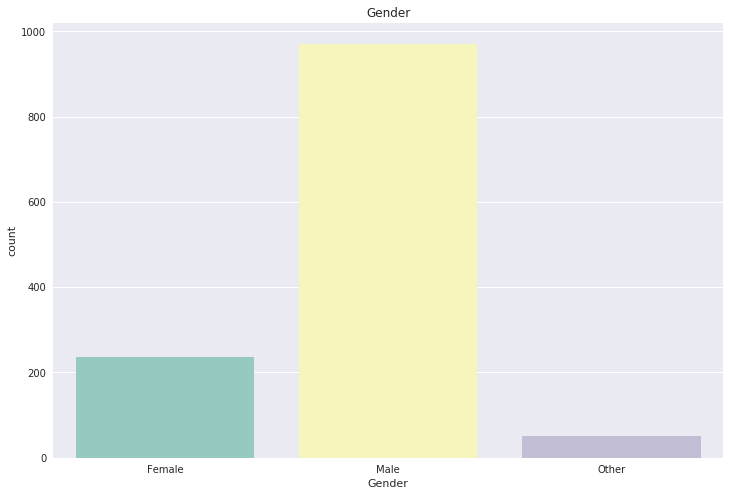

In [14]:
sns.countplot(data=df, x='Gender')
plt.title('Gender')
plt.show()

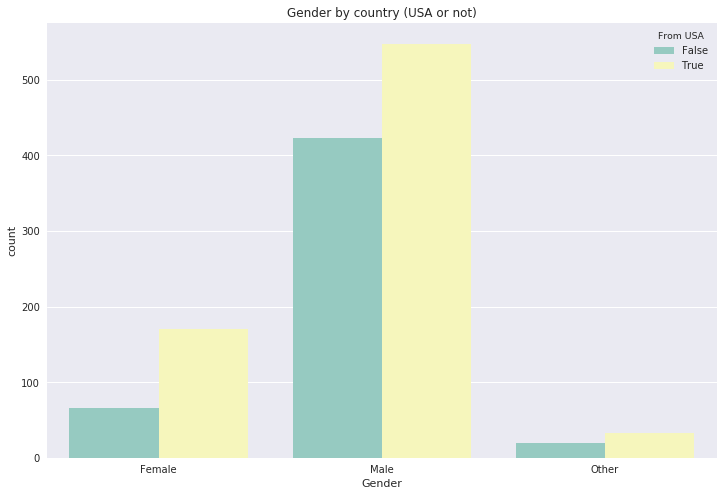

In [15]:
sns.countplot(data=df, x='Gender', hue='From USA')
plt.title('Gender by country (USA or not)')
plt.show()

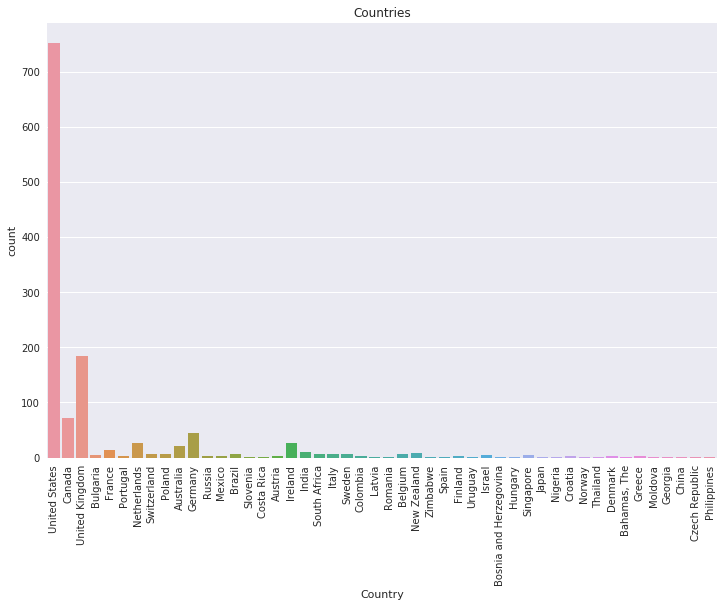

In [16]:
sns.countplot(data=df, x='Country')
plt.title('Countries')
plt.xticks(rotation=90)
plt.show()

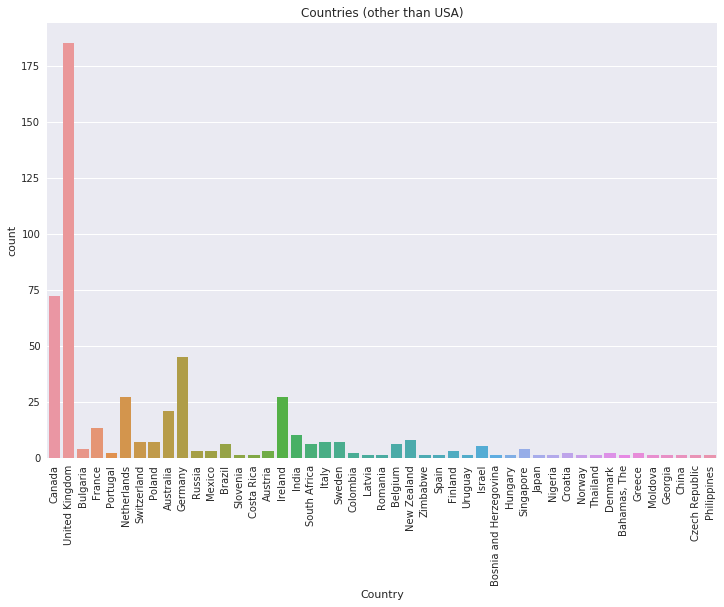

In [17]:
sns.countplot(data=df[~df['From USA']], x='Country')
plt.title('Countries (other than USA)')
plt.xticks(rotation=90)
plt.show()

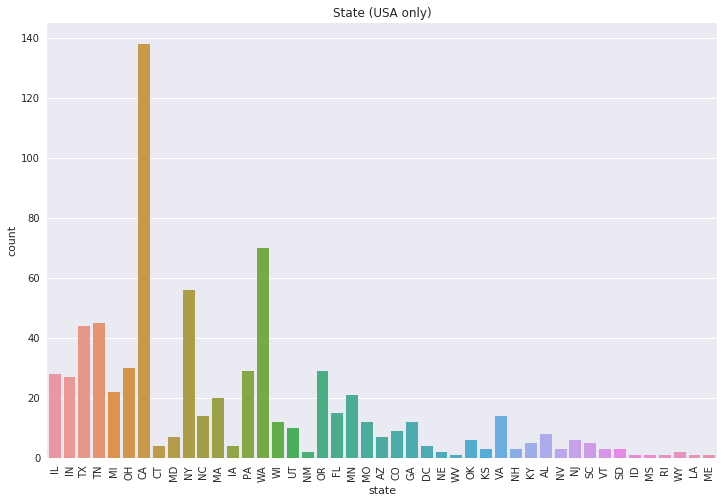

In [18]:
sns.countplot(data=df[df['Country'] == 'United States'], x='state')
plt.title('State (USA only)')
plt.xticks(rotation=90)
plt.show()

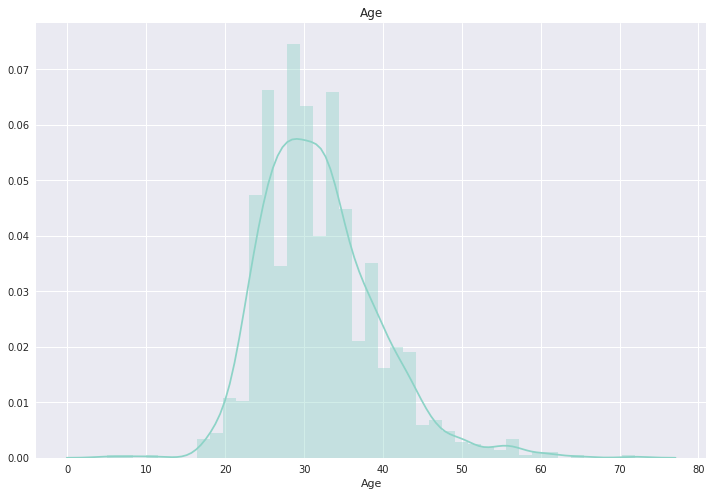

In [19]:
sns.distplot(df['Age'].dropna())
plt.title('Age')
plt.show()

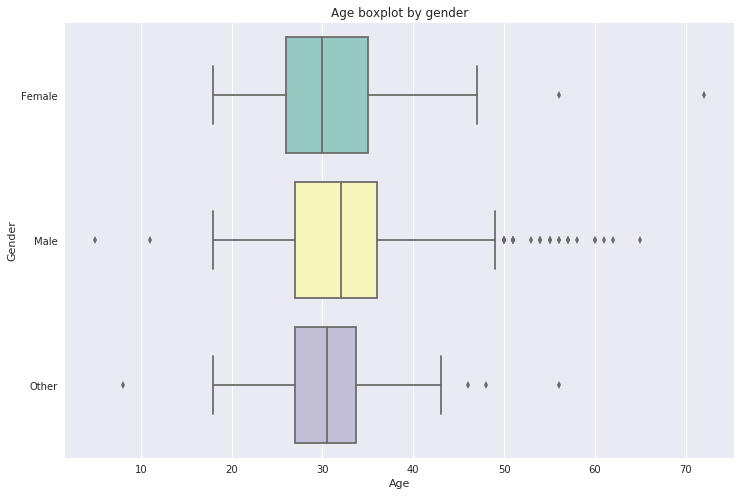

In [20]:
sns.boxplot(data=df, x='Age', y='Gender', orient='h')
plt.title('Age boxplot by gender')
plt.show()

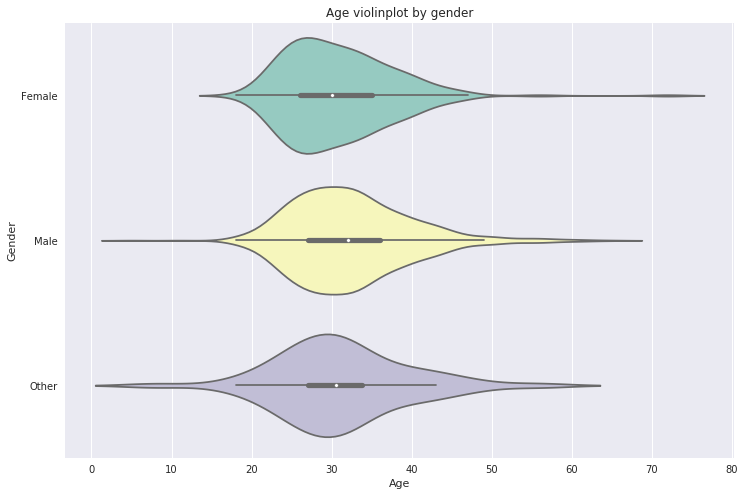

In [21]:
sns.violinplot(data=df, x='Age', y='Gender', orient='h')
plt.title('Age violinplot by gender')
plt.show()

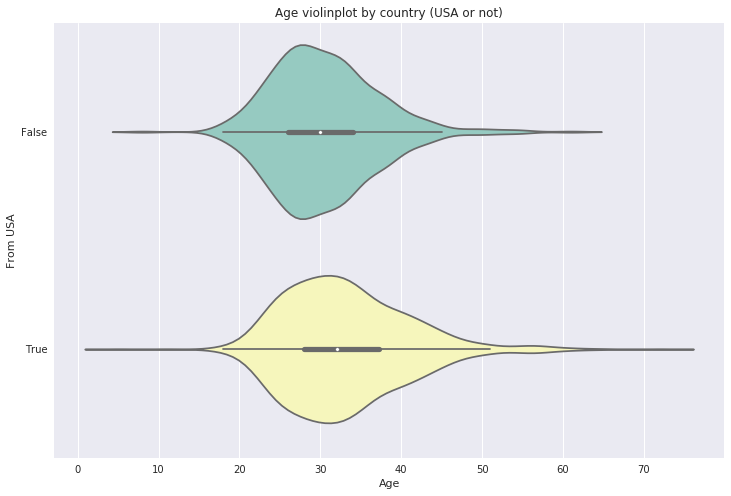

In [22]:
sns.violinplot(data=df, x='Age', y='From USA', orient='h')
plt.title('Age violinplot by country (USA or not)')
plt.show()

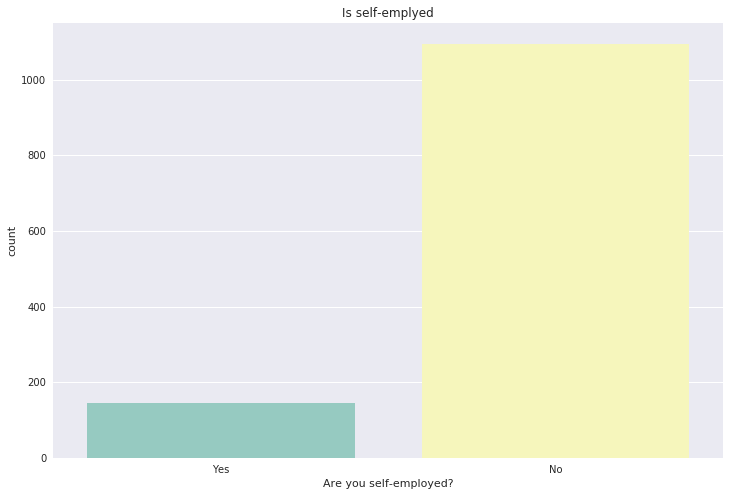

In [23]:
sns.countplot(data=df, x='self_employed')
plt.title('Is self-emplyed')
plt.xlabel('Are you self-employed?')
plt.show()

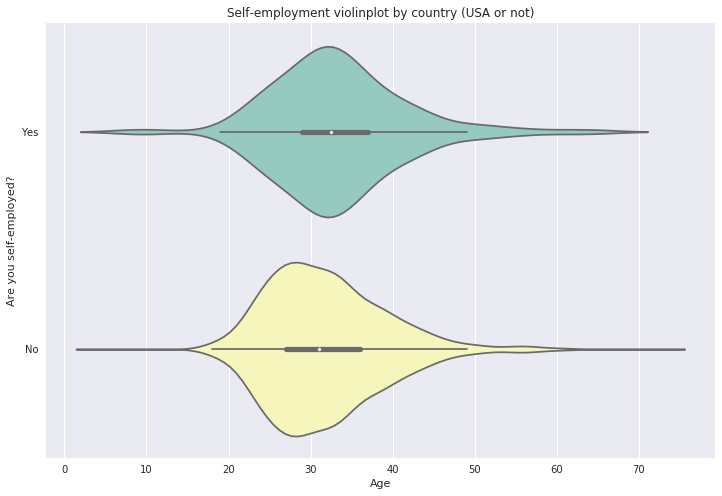

In [24]:
sns.violinplot(data=df, x='Age', y='self_employed', orient='h')
plt.title('Self-employment violinplot by country (USA or not)')
plt.ylabel('Are you self-employed?')
plt.show()

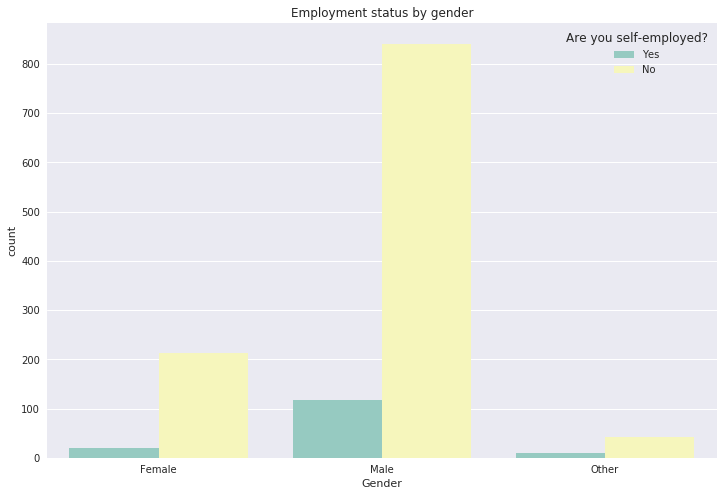

In [25]:
g = sns.countplot(data=df, x='Gender', hue='self_employed')
g.figure.get_axes()[0].legend(title='Are you self-employed?')
plt.title('Employment status by gender')
plt.show()

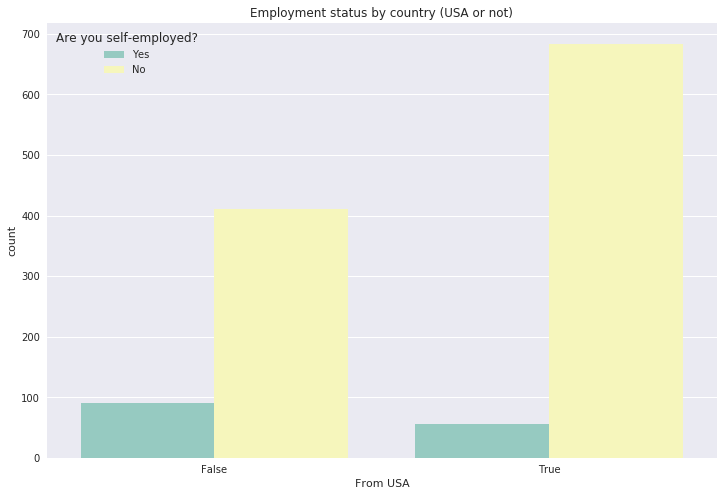

In [26]:
g = sns.countplot(data=df, x='From USA', hue='self_employed')
g.figure.get_axes()[0].legend(title='Are you self-employed?')
plt.title('Employment status by country (USA or not)')
plt.show()

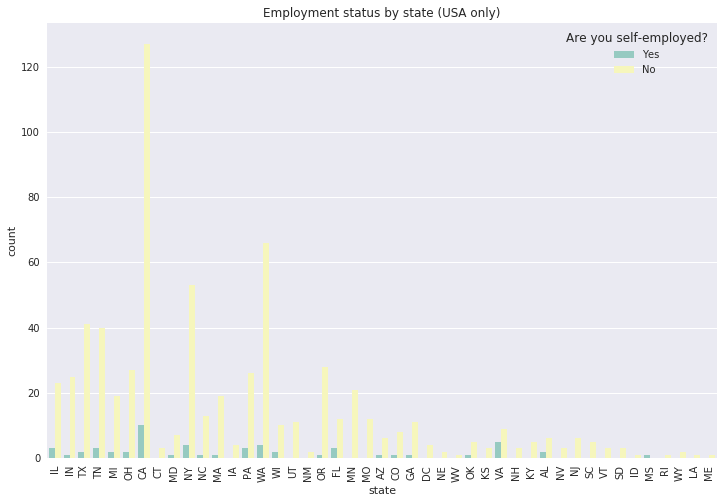

In [27]:
g = sns.countplot(data=df, x='state', hue='self_employed')
g.figure.get_axes()[0].legend(title='Are you self-employed?', loc='upper right')
plt.title('Employment status by state (USA only)')
plt.xticks(rotation=90)
plt.show()

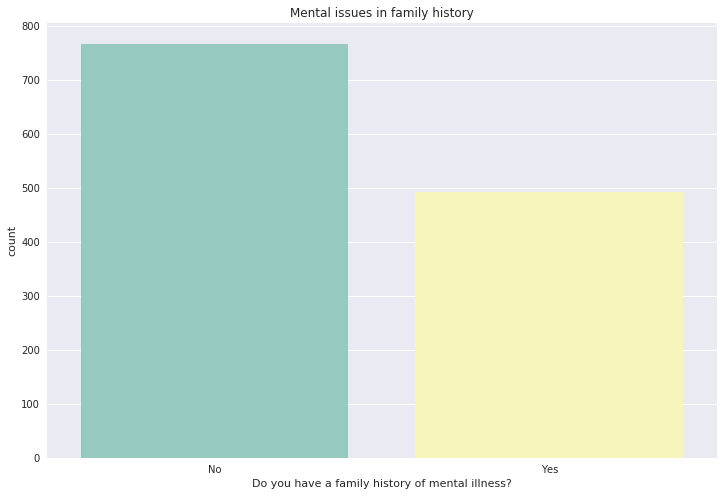

In [28]:
sns.countplot(data=df, x='family_history')
plt.title('Mental issues in family history')
plt.xlabel('Do you have a family history of mental illness?')
plt.show()

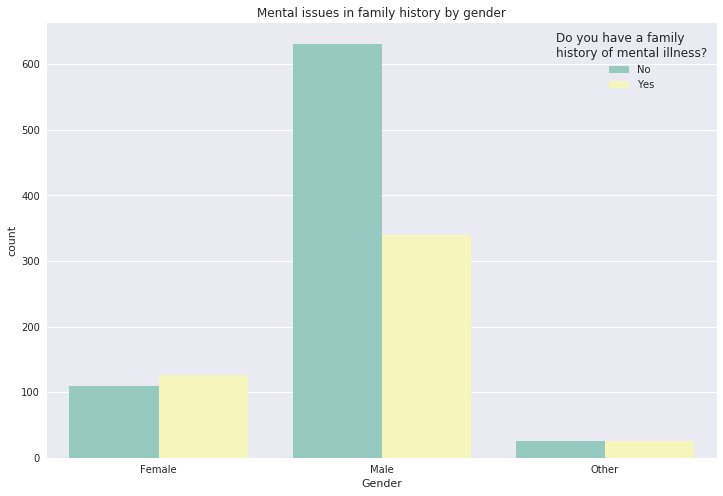

In [29]:
g = sns.countplot(data=df, x='Gender', hue='family_history')
g.figure.get_axes()[0].legend(title='Do you have a family\nhistory of mental illness?')
plt.title('Mental issues in family history by gender')
plt.show()

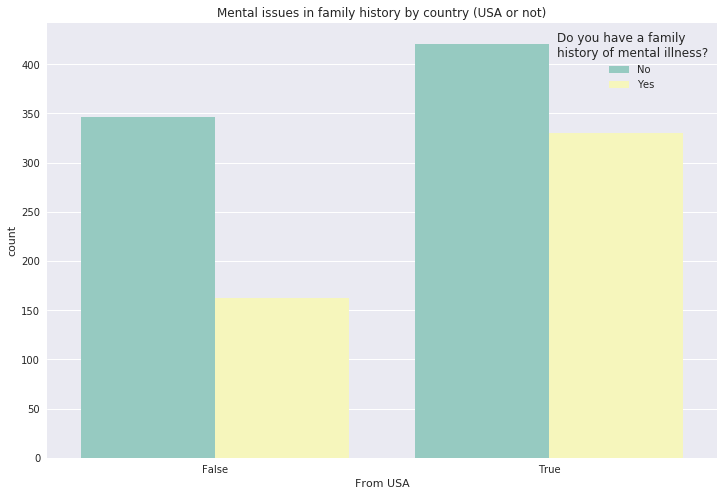

In [30]:
g = sns.countplot(data=df, x='From USA', hue='family_history')
g.figure.get_axes()[0].legend(title='Do you have a family\nhistory of mental illness?')
plt.title('Mental issues in family history by country (USA or not)')
plt.show()

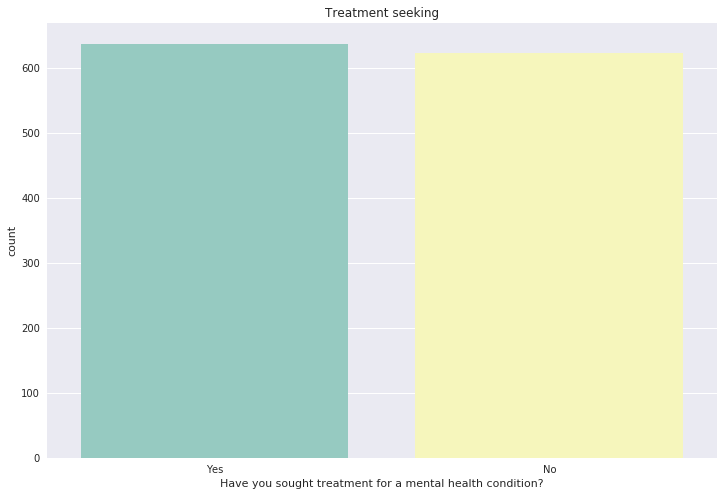

In [31]:
sns.countplot(data=df, x='treatment')
plt.title('Treatment seeking')
plt.xlabel('Have you sought treatment for a mental health condition?')
plt.show()

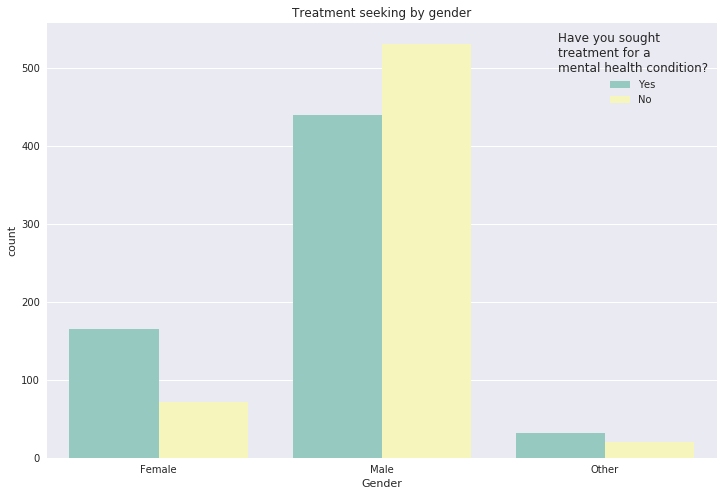

In [32]:
g = sns.countplot(data=df, x='Gender', hue='treatment')
g.figure.get_axes()[0].legend(title='Have you sought\ntreatment for a\nmental health condition?')
plt.title('Treatment seeking by gender')
plt.show()

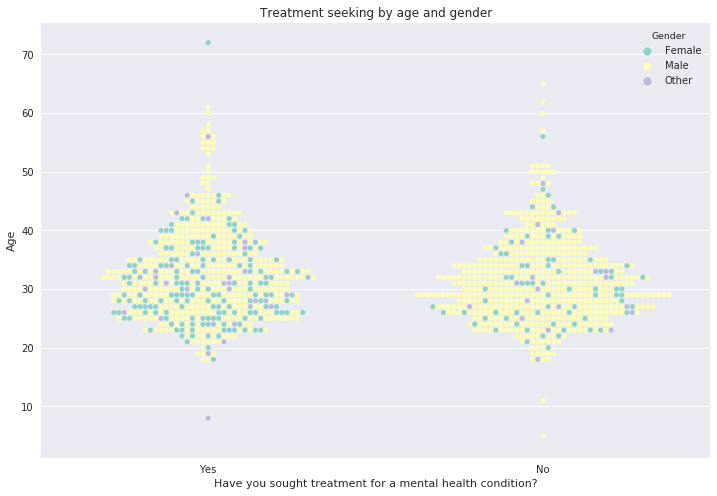

In [33]:
sns.swarmplot(x='treatment', y='Age', hue='Gender', data=df)
plt.title('Treatment seeking by age and gender')
plt.xlabel('Have you sought treatment for a mental health condition?')
plt.show()

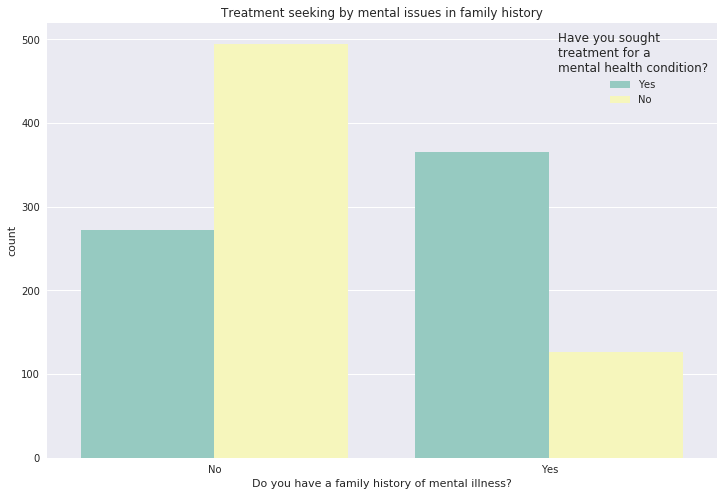

In [34]:
g = sns.countplot(data=df, x='family_history', hue='treatment')
g.figure.get_axes()[0].legend(title='Have you sought\ntreatment for a\nmental health condition?')
plt.title('Treatment seeking by mental issues in family history')
plt.xlabel('Do you have a family history of mental illness?')
plt.show()

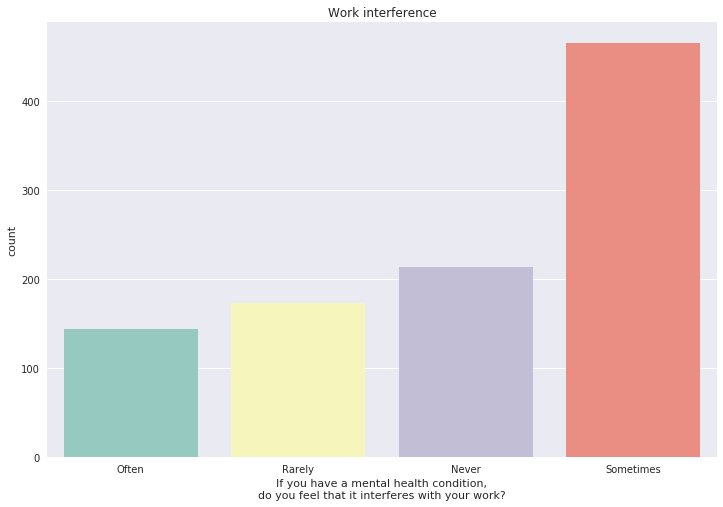

In [35]:
sns.countplot(data=df, x='work_interfere')
plt.title('Work interference')
plt.xlabel('If you have a mental health condition,\ndo you feel that it interferes with your work?')
plt.show()

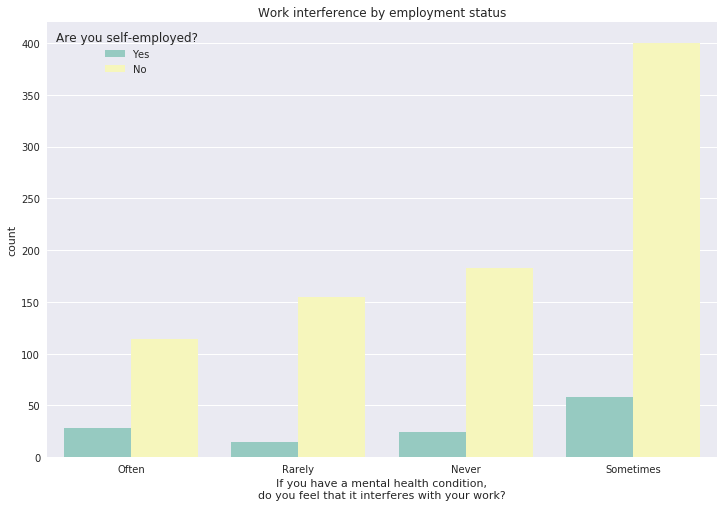

In [36]:
g = sns.countplot(data=df, x='work_interfere', hue='self_employed')
g.figure.get_axes()[0].legend(title='Are you self-employed?')
plt.title('Work interference by employment status')
plt.xlabel('If you have a mental health condition,\ndo you feel that it interferes with your work?')
plt.show()

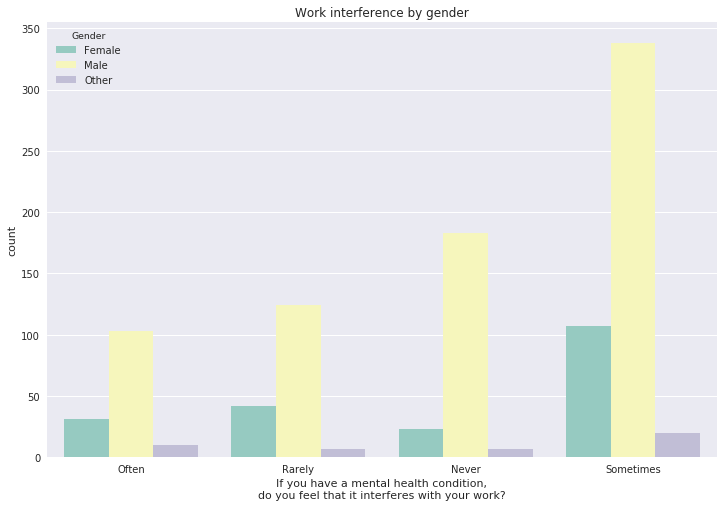

In [37]:
sns.countplot(data=df, x='work_interfere', hue='Gender')
plt.title('Work interference by gender')
plt.xlabel('If you have a mental health condition,\ndo you feel that it interferes with your work?')
plt.show()

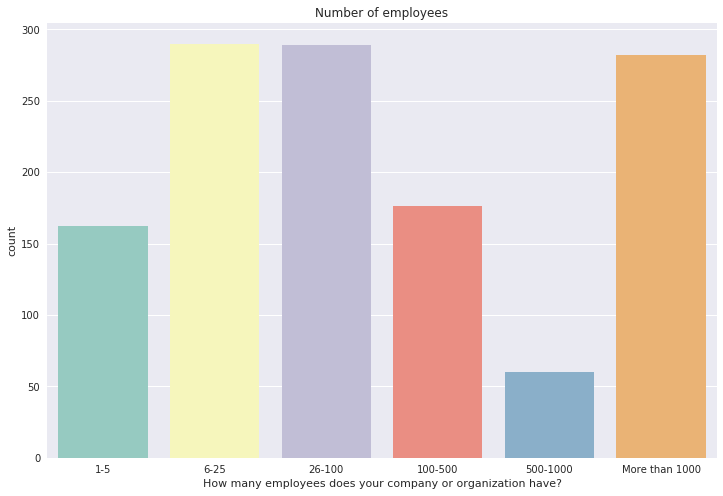

In [38]:
df['no_employees'].value_counts()
sns.countplot(data=df, x='no_employees', order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
plt.title('Number of employees')
plt.xlabel('How many employees does your company or organization have?')
plt.show()

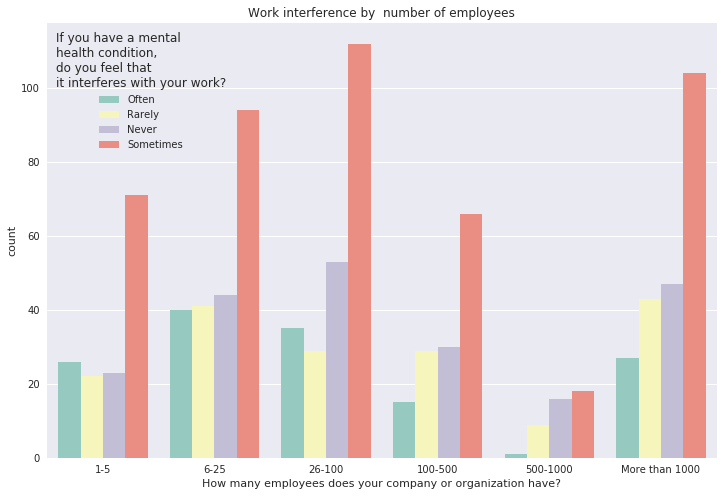

In [39]:
df['no_employees'].value_counts()
g = sns.countplot(
    data=df,
    x='no_employees',
    order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    hue='work_interfere'
)
g.figure.get_axes()[0].legend(
    title='If you have a mental\nhealth condition,\ndo you feel that\nit interferes with your work?'
)
plt.title('Work interference by  number of employees')
plt.xlabel('How many employees does your company or organization have?')
plt.show()

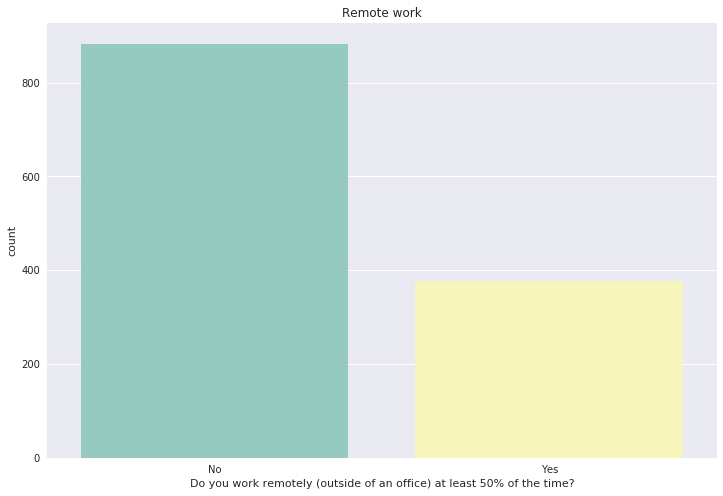

In [40]:
sns.countplot(data=df, x='remote_work')
plt.title('Remote work')
plt.xlabel('Do you work remotely (outside of an office) at least 50% of the time?')
plt.show()

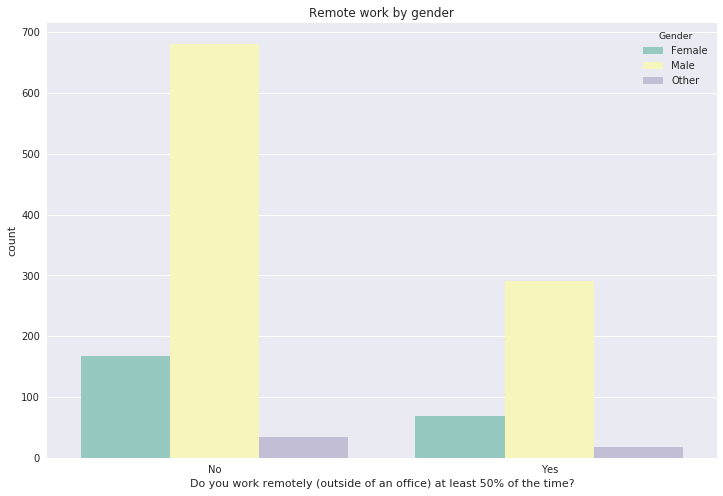

In [41]:
sns.countplot(data=df, x='remote_work', hue='Gender')
plt.title('Remote work by gender')
plt.xlabel('Do you work remotely (outside of an office) at least 50% of the time?')
plt.show()

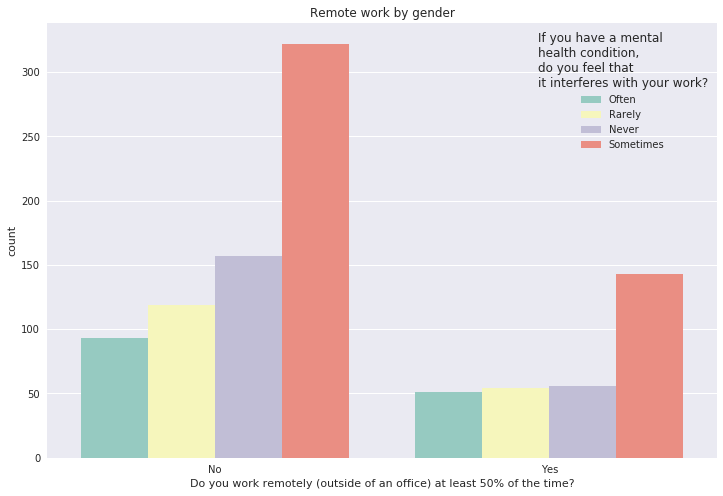

In [42]:
g = sns.countplot(data=df, x='remote_work', hue='work_interfere')
g.figure.get_axes()[0].legend(
    title='If you have a mental\nhealth condition,\ndo you feel that\nit interferes with your work?'
)
plt.title('Remote work by gender')
plt.xlabel('Do you work remotely (outside of an office) at least 50% of the time?')
plt.show()